In [2]:
# Pandas와 Sklearn Learn을 import 함.
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# Google colab 올려진 데이터를 읽어 들임.
df = pd.read_csv('drive/MyDrive/creditcard.csv')

In [5]:
# 로딩된 데이터 확인.
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# 데이터의 컬럼 수와 행 수 확인.
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# 널 값이 있는지 확인함.
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# 타겟 변수의 값을 이용해서 타겟 컬럼에 속행 있는 값 별로 데이터 수 확인.
df.loc[:, 'Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
df.iloc[:, -1].value_counts()

0    284315
1       492
Name: Class, dtype: int64

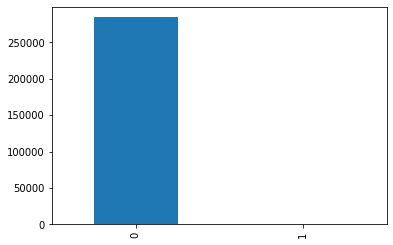

In [11]:
# 바 차트를 이용해서 타겟 변수 값에 의해 분류된 데이터 수를 시각화 함.
df.loc[:, 'Class'].value_counts().plot(kind='bar')

In [12]:
# Data Unbalance 확인.
# 클래스 별로 퍼센트로 표현
df.iloc[:, -1].value_counts()/df.iloc[:, -1].count()*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [13]:
# 데이터 부분과 라벨 부분 분리.
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [15]:
# 분리된 데이터 확인
Y.shape

(284807,)

In [16]:
X.shape

(284807, 30)

In [17]:
# 모델 학습 준비 시작.
# 트래인 데이터와 테스트 데이터 부분을 나눔.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [18]:
# 나누어진 트레인 데이터 비율 확인
print (Y_train.value_counts()/Y_train.count()*100)

0    99.826315
1     0.173685
Name: Class, dtype: float64


In [19]:
# 나누어진 테스트 데이터 비율 확인
print (Y_test.value_counts()/Y_test.count()*100)

0    99.830061
1     0.169939
Name: Class, dtype: float64


In [20]:
# 모델 생성 함수 정의
# 모델 생성 함수 
def modeling(model, X_train, X_test, Y_train, Y_test):
  model.fit(X_train, Y_train)
  pred = model.predict(X_test)
  metrics(Y_test, pred)

In [21]:
# 모델 평가 함수 정의
def metrics(Y_test, pred):
  accuracy = accuracy_score(Y_test, pred)
  precision = precision_score(Y_test, pred)
  recall = recall_score(Y_test, pred)
  f1 = f1_score(Y_test, pred)
  roc_score = roc_auc_score(Y_test, pred, average='macro')
  print ('정확도: {0:.2f}, 정밀도: {1:.2f}, 재현율: {2: .2f}'.format(accuracy, precision, recall))
  print ('f1-score: {0:.2f}, auc: {1:.2f}'.format(f1, roc_score))

In [22]:
# 현재 까지 데이터에 아무런 수정을 한 것이 없음.
# 이 상태에서 Scikit-Learn Logistic Regression을 이용해서 모델 생성.

In [23]:
# 모델 생성이 필요한 Scikit-Learn 라이브러리 import.
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [24]:
# 현재 Standarization을 하지 않았기 때문에, Convergence 문제가 발생할 수 있어, Max_Iter 파라미터를 설정해줘야 함.
lr = LogisticRegression(max_iter=1000) # 로지스틱 리그레션 모델.
modeling(lr, X_train, X_test, Y_train, Y_test)

정확도: 1.00, 정밀도: 0.73, 재현율:  0.74
f1-score: 0.73, auc: 0.87


In [26]:
# 비교 모델로 LightGBM import.
from lightgbm import LGBMClassifier

In [27]:
# LightGBM 생성.
lgb = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
modeling(lgb, X_train, X_test, Y_train, Y_test)

정확도: 1.00, 정밀도: 0.95, 재현율:  0.83
f1-score: 0.88, auc: 0.91


In [28]:
# 여기서 부터, 앞서 생성된 모델들의 메트릭스를 향상 시키는 것이 목표임.
# 먼저 데이터의 분포를 확인해 보기 위해 플롯 기능들을 import 함
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# 다른 컬럼들의 의미를 알 수 없지만, Amount와 Time은 일단 짐작할 수 있으니 이 두 컬럼을 살펴보고 데이터를 변형 함.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 172792.0)

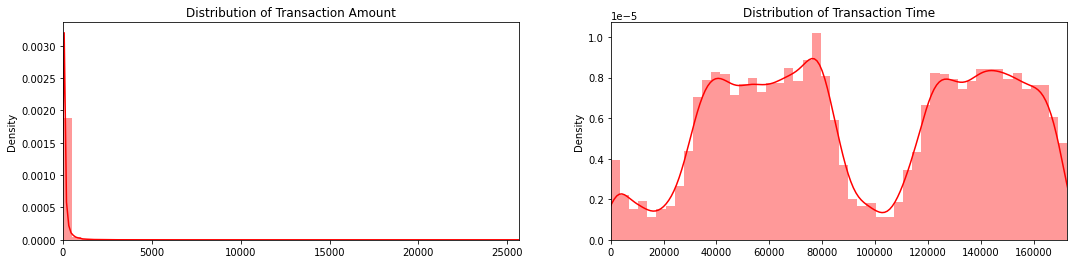

In [29]:
# Amount와 Time 컬럼의 데이터 분포 확인.
fig, ax = plt.subplots(1,2,figsize=(18,4))
amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time')
ax[1].set_xlim([min(time_val), max(time_val)])

In [ ]:
# 위의 두 컬럼의 데이터 값들의 분포를 보면 값의 범위가 상당히 넓은 것을 확인할 수 있음.
# 그리고 이렇게 값이 너무 커게 되면 값이 큰 변수들에 의해 모델이 외곡될 수 있음.

In [30]:
# 데이터 정규화를 위해 표준화 과정을 적용함.
# 먼저 Standarization과 Log Scale등을 적용해 봄.
from sklearn.preprocessing import StandardScaler
import numpy as np

In [31]:
# StandardScaler 적용.
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['logged_amount'] = np.log1p(df['Amount'].values.reshape(-1,1))

In [32]:
df.shape

(284807, 33)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           284807 non-null  float64
 1   V1             284807 non-null  float64
 2   V2             284807 non-null  float64
 3   V3             284807 non-null  float64
 4   V4             284807 non-null  float64
 5   V5             284807 non-null  float64
 6   V6             284807 non-null  float64
 7   V7             284807 non-null  float64
 8   V8             284807 non-null  float64
 9   V9             284807 non-null  float64
 10  V10            284807 non-null  float64
 11  V11            284807 non-null  float64
 12  V12            284807 non-null  float64
 13  V13            284807 non-null  float64
 14  V14            284807 non-null  float64
 15  V15            284807 non-null  float64
 16  V16            284807 non-null  float64
 17  V17            284807 non-nul

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-0.35322939296682354, 102.36224270928423)

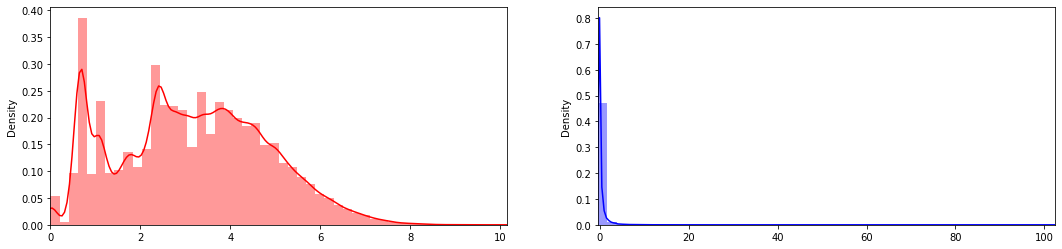

In [34]:
# 변형된 컬럼 데이터들의 분포 확인.
fig, ax = plt.subplots(1,2,figsize=(18,4))
logged_amount = df['logged_amount'].values
scaled_amount = df['scaled_amount'].values

sns.distplot(logged_amount, ax=ax[0], color='r')
ax[0].set_xlim([min(logged_amount), max(logged_amount)])

sns.distplot(scaled_amount, ax=ax[1], color='b')
ax[1].set_xlim([min(scaled_amount), max(scaled_amount)])

In [ ]:
# Scale된 쪽이 기존의 데이터 분포와 비슷하기 때문에 Scale된 컬럼은 사용하고 Log 변환한 쪽은 무시함.

In [35]:
# 다음은 Time 컬럼에 대해, Robust Scale과 Log Scale그리고 Standard Scale 3개를 적용해서 Normalization을 진행함.
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

In [36]:
# 새로운 컬럼 3개를 변형해서 데이터 프래임에 추가시킴.
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['logged_time'] = np.log1p(df['Time'].values.reshape(-1,1))
df['std_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

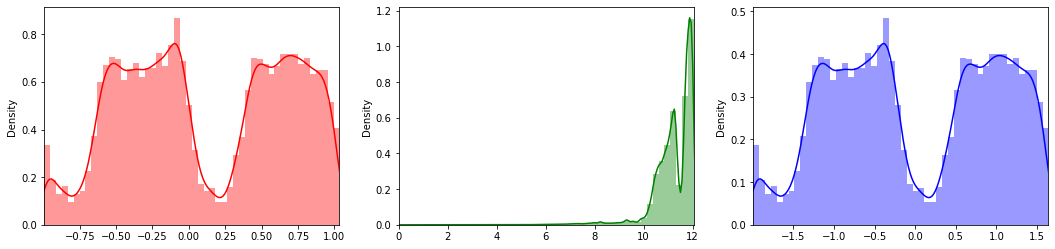

In [37]:
# 새로 추가된 3개의 컬럼의 분포를 살펴봄.
fig, ax = plt.subplots(1,3,figsize=(18,4))
scaled_time = df['scaled_time'].values
logged_time = df['logged_time'].values
std_time = df['std_time'].values

sns.distplot(scaled_time, ax=ax[0], color='r')
ax[0].set_xlim([min(scaled_time), max(scaled_time)])

sns.distplot(logged_time, ax=ax[1], color='g')
ax[1].set_xlim([min(logged_time), max(logged_time)])

sns.distplot(std_time, ax=ax[2], color='b')
ax[2].set_xlim([min(std_time), max(std_time)])

plt.show()

In [ ]:
# Robust 쪽이 기존 데이터와 분포가 유사하면서 데이터 값의 범위가 Standard 쪽 보다 작기 때문에 Robust 쪽 선택함.

In [38]:
# 그럼 이제 새로 추가된 컬럼들은 사용하고 기존의 컬럼들은 Drop함.
df.drop(['logged_time', 'std_time', 'logged_amount', 'Time', 'Amount'], axis = 1, inplace=True)

In [39]:
# Drop 된 컬럼 확인.
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-0.994960


In [40]:
# 새로 추가된 컬럼들을 앞 쪽으로 위치 시킴.
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_time', 'scaled_amount'], axis=1, inplace=True)
df.insert(0,'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [41]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [42]:
# 모델을 새로 추가된 컬럼들을 이용해서 다시 측정해 봄.
lr = LogisticRegression(max_iter=1000) # 로지스틱 리그레션 모델.
modeling(lr, X_train, X_test, Y_train, Y_test)

정확도: 1.00, 정밀도: 0.73, 재현율:  0.74
f1-score: 0.73, auc: 0.87


In [ ]:
# 이전 모델 성능(Logistic Regression)
정확도: 1.00, 정밀도: 0.83, 재현율:  0.64
f1-score: 0.73, auc: 0.82

In [44]:
# LightGBM 재실행.
lgb = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
modeling(lgb, X_train, X_test, Y_train, Y_test)

정확도: 1.00, 정밀도: 0.95, 재현율:  0.83
f1-score: 0.88, auc: 0.91


In [ ]:
# 이전 모델 성능(LightGBM)
정확도: 1.00, 정밀도: 0.95, 재현율:  0.83
f1-score: 0.88, auc: 0.91

In [ ]:
# 데이터를 변형해서 모델 성능을 다시 측정했으나, 별다른 변화는 없음.
# 물론 다른 컬럼들도 해 봐야 변형을 해줘야 겠지만, 먼저 Sampling 방법으로 접근해서 성능 측정을 해보는 것이 
# 성능 개선에 효과적일 듯 함.
# 데이터 변형을 하지 않았을 때와 했을 때, 모두 LightGBM이 우수한 성능을 보임.